In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
X = train.drop(['ID_code','target'], axis=1).values
y = train['target'].values

In [5]:
(y==1).sum(),(y==0).sum()

(20098, 179902)

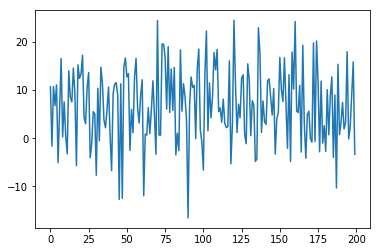

In [6]:
plt.plot(X.mean(axis=0))

In [7]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [8]:
gboost = GradientBoostingClassifier()
forest = RandomForestClassifier()

**It is taking too long to train, I will use a subsample**

In [9]:
X_true = X[y==1]
X_false = X[y==0]

In [10]:
mask = np.random.choice(np.arange(len(X_false)),size=(y==1).sum(),replace=False)
X_false_sub = X_false[mask]

In [11]:
X_sub = np.concatenate((X_true,X_false_sub))
y_sub = np.concatenate((np.ones(len(X_true)),np.zeros(len(X_false_sub))))

In [12]:
shuffle = np.random.permutation(len(X_sub))
X_sub = X_sub[shuffle]
y_sub = y_sub[shuffle]

In [30]:
gboost.fit(X_sub,y_sub)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [31]:
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv',index_col=0)

In [32]:
X_test = test.drop(['ID_code'],axis=1).values

In [33]:
pred = gboost.predict(X_test)

In [34]:
pred.shape

(200000,)

In [35]:
submit.shape

(200000, 1)

In [36]:
submit.head()

,target
ID_code,
test_0,0
test_1,0
test_2,0
test_3,0
test_4,0


In [37]:
submit['target'] = pred

In [38]:
submit.head()

,target
ID_code,
test_0,1.0
test_1,1.0
test_2,1.0
test_3,0.0
test_4,0.0


In [39]:
submit.to_csv('naive.csv')